# Problem Statement

In [94]:
# Required All Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import json
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB


# Data Gathering

In [2]:
# Received data from data management team in csv format on server
df=pd.read_csv(r"D:\DATA SCIENCE\Practice\project\Bank_pro\24-12-22_practice\bank_data.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [3]:
# check all duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [4]:
# findout the missing values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
# check the data decription
df.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [6]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
# function to get all unique values in the categorical variables
categorical_list=[]
numerical_list=[]
def unique_val(data):
    cols = data.columns
    for i in cols:
        if data[i].dtype == 'O':
            print('Unique values in',i,'are',data[i].unique())
            print('----------------------------------------------')
            categorical_list.append(i)
        else:
            numerical_list.append(i)
            
# Getting the unique values in the categorical columns
unique_val(df)

Unique values in job are ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
----------------------------------------------
Unique values in marital are ['married' 'single' 'divorced']
----------------------------------------------
Unique values in education are ['tertiary' 'secondary' 'unknown' 'primary']
----------------------------------------------
Unique values in default are ['no' 'yes']
----------------------------------------------
Unique values in housing are ['yes' 'no']
----------------------------------------------
Unique values in loan are ['no' 'yes']
----------------------------------------------
Unique values in contact are ['unknown' 'cellular' 'telephone']
----------------------------------------------
Unique values in month are ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
----------------------------------------------
Unique values in poutcom

In [8]:
# Univariant Analysis
def uni(data):
    col=data.columns
    for i in col:
        sns.countplot(data[i])
        plt.show()

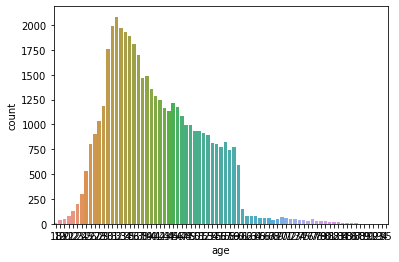

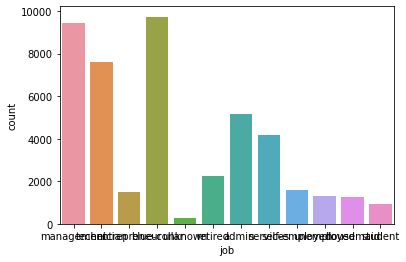

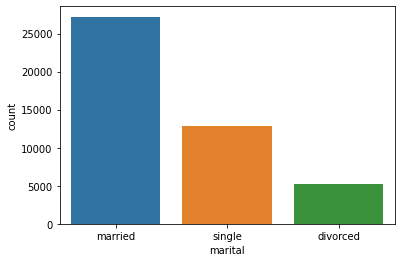

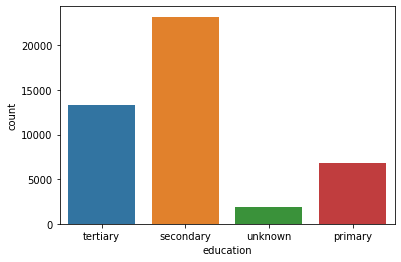

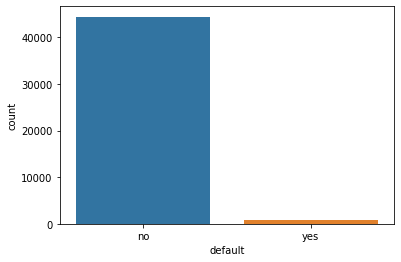

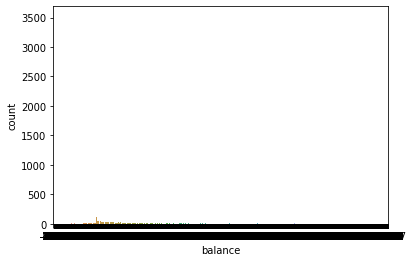

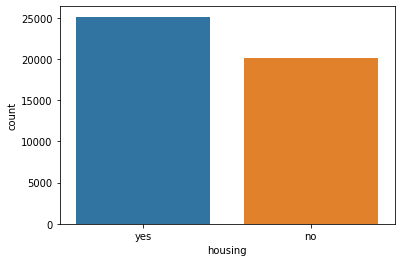

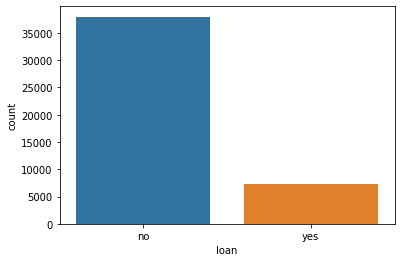

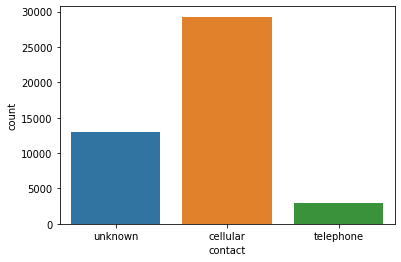

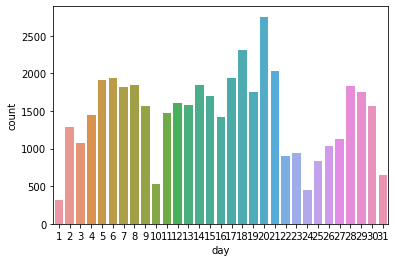

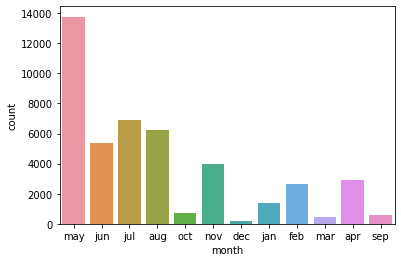

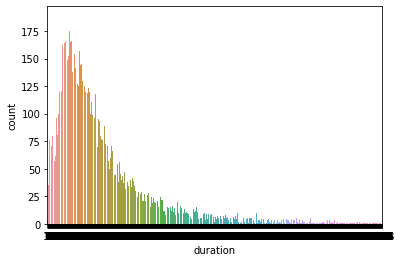

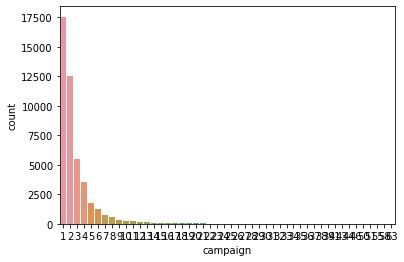

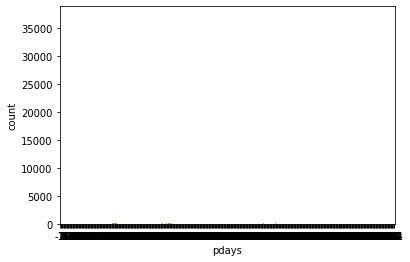

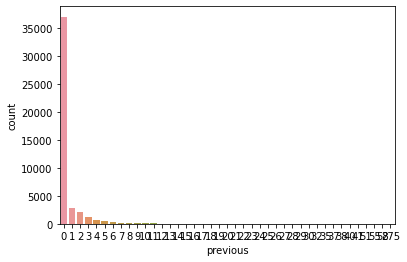

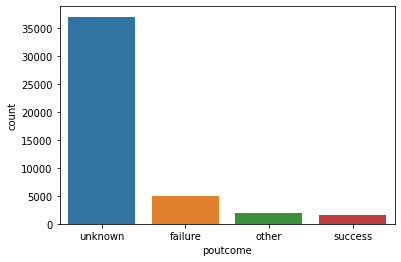

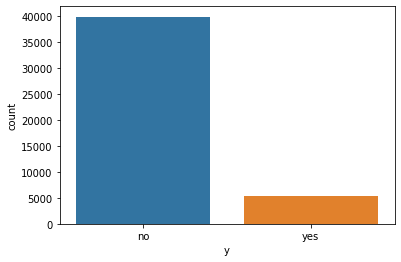

In [9]:
uni(df)

In [10]:
# Bivariant Analysis
def bivariant(data):
    col=data.columns
    for i in col:
        sns.scatterplot(x=data[i],y=data["y"])
        plt.show()

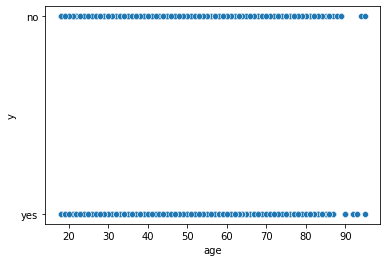

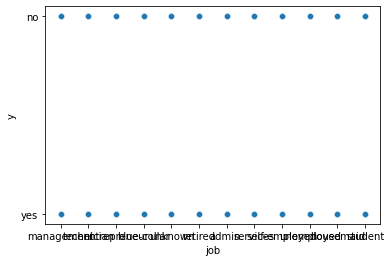

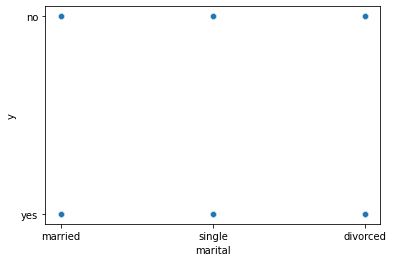

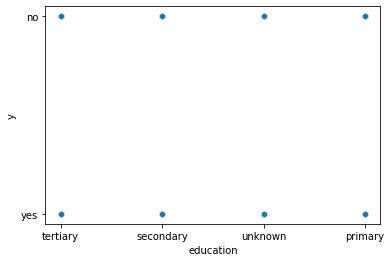

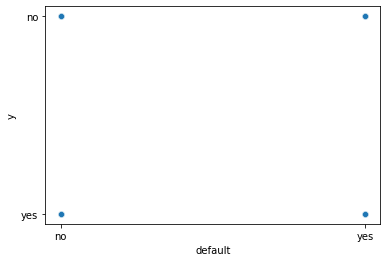

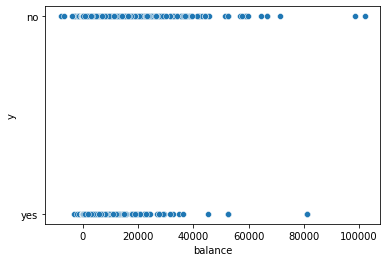

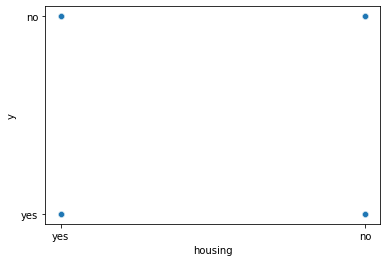

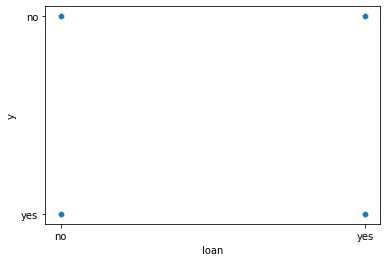

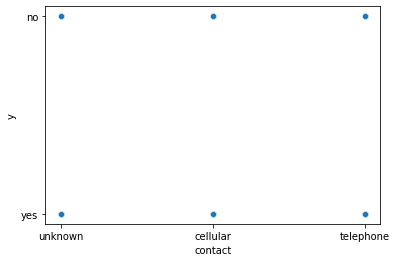

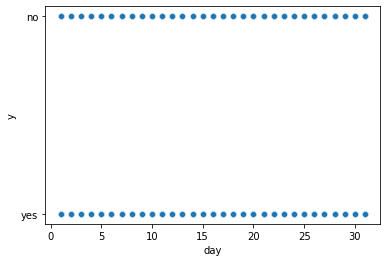

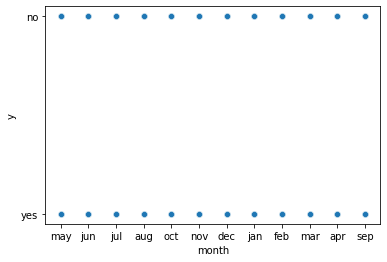

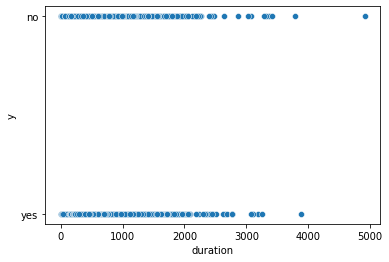

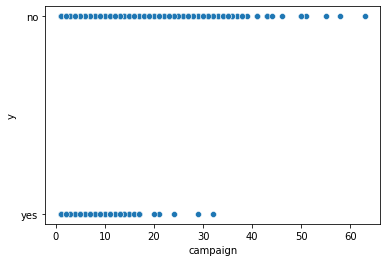

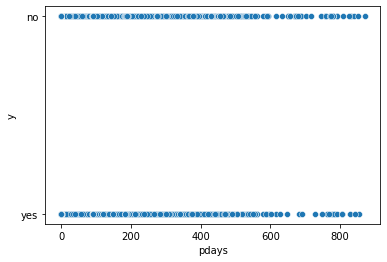

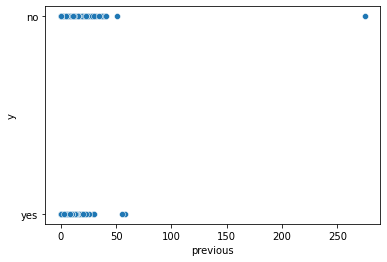

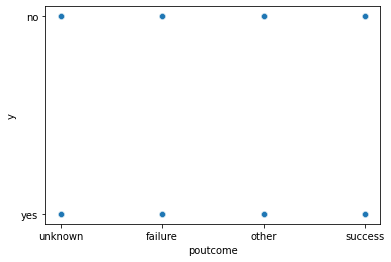

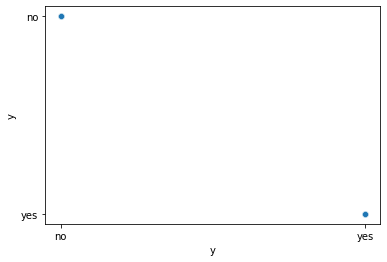

In [11]:
bivariant(df)

In [12]:
# Multivariant Analysis
def Multivariant(data):
    sns.pairplot(data)

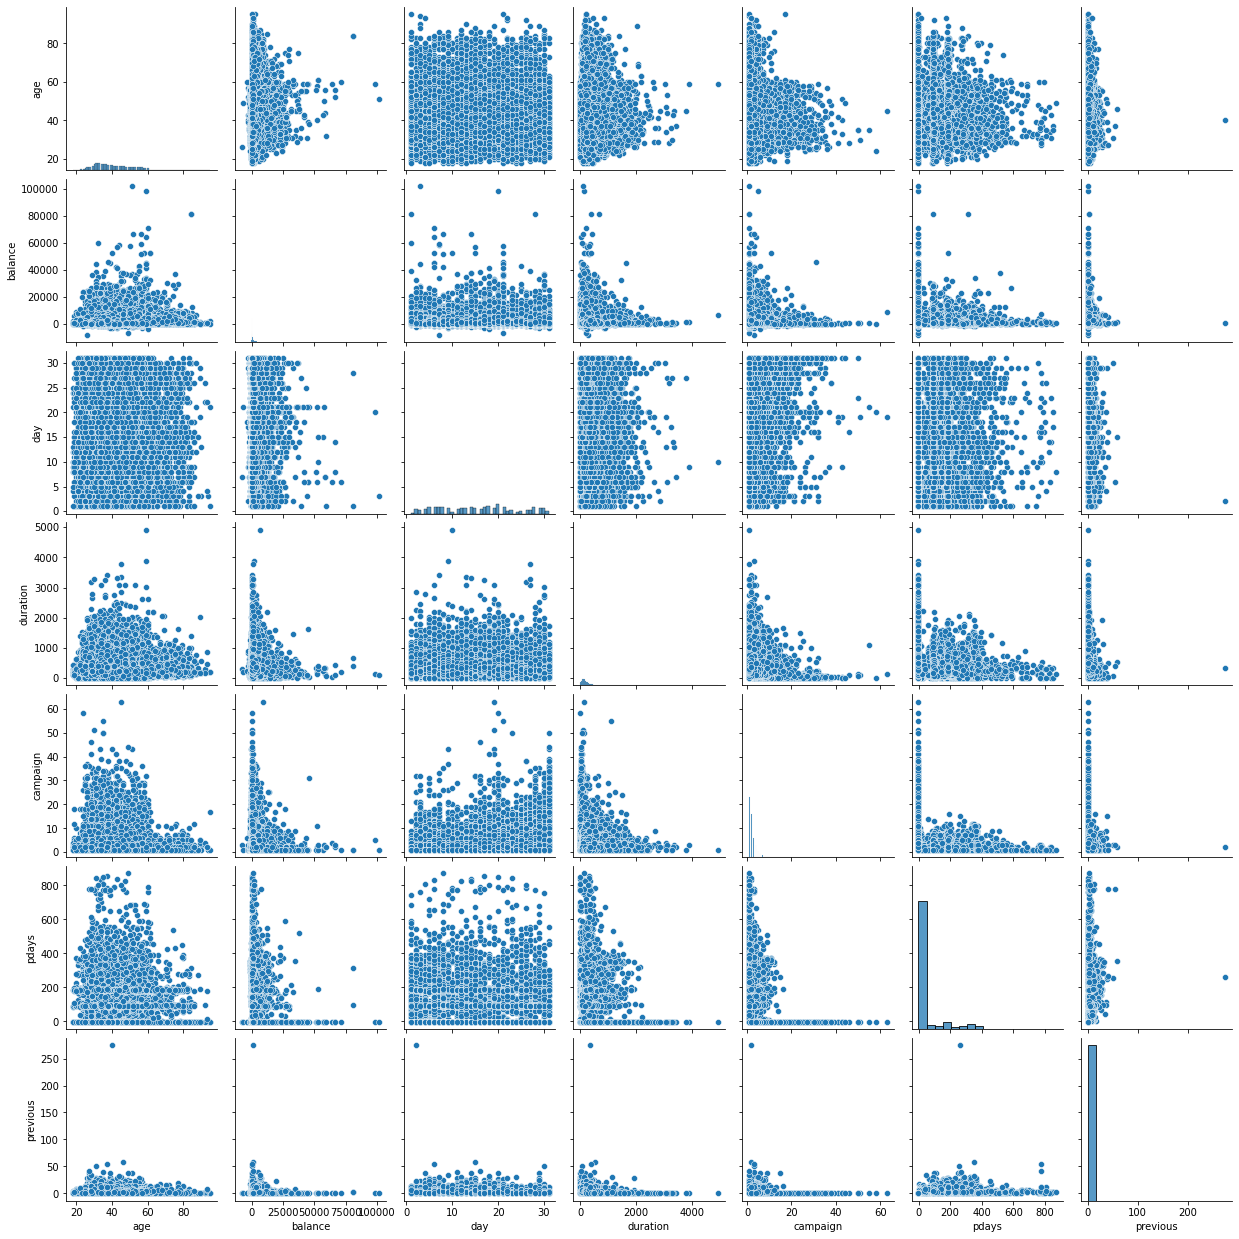

In [13]:
Multivariant(df)

In [14]:
# findout outliers from data
def outliers(data):
    col=numerical_list
    print(col)
    for i in col:
        data.boxplot(column=i)
        plt.show()

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


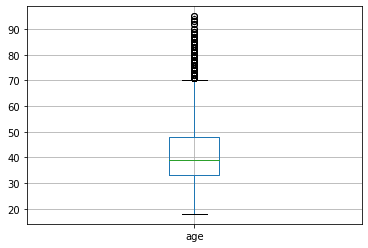

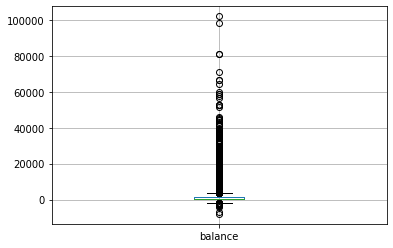

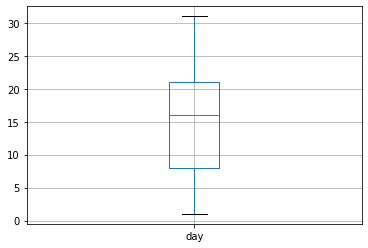

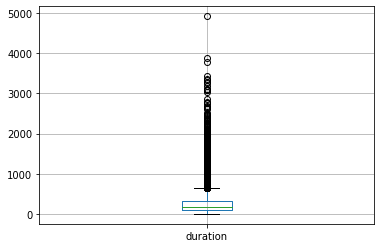

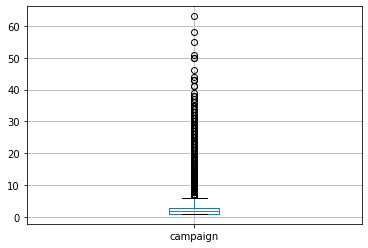

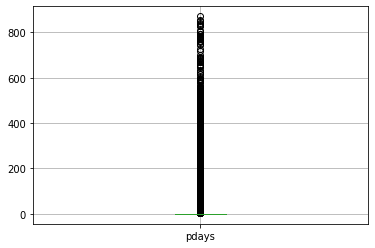

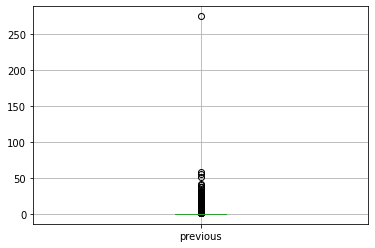

In [15]:
outliers(df)

In [16]:
# findout outliers_values from data
def outliers_values(data):
    col=numerical_list
    for i in col:
        minimum,maximum=out_IQR(data,i)
        print(minimum,maximum,"Scale of",i)
        
        
def out_IQR(data,i):
    q1=data[i].quantile(0.25)
    q2=data[i].quantile(0.50)
    q3=data[i].quantile(0.75)
    iqr=q3-q1
    min_value=q1-1.5*iqr
    max_value=q3+1.5*iqr
    return min_value,max_value

In [17]:
outliers_values(df)

10.5 70.5 Scale of age
-1962.0 3462.0 Scale of balance
-11.5 40.5 Scale of day
-221.0 643.0 Scale of duration
-2.0 6.0 Scale of campaign
-1.0 -1.0 Scale of pdays
0.0 0.0 Scale of previous


# Feature Engineering

In [18]:
categorical_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [19]:
# convert descrete data to numerical
df["education"]=df["education"].replace({'tertiary':3,'secondary':2,'unknown':0,'primary':1})
df["default"]=df["default"].replace({'yes':1,'no':0})
df["housing"]=df["housing"].replace({'yes':1,'no':0})
df["loan"]=df["loan"].replace({'yes':1,'no':0})
df["y"]=df["y"].replace({'yes':1,'no':0})
df["contact"]=df["contact"].replace({'unknown':0,'cellular':1,'telephone':2})
df["month"]=df["month"].replace({'may':5,'jun':6,'jul':7,'aug':8,'oct':10,'nov':11,'dec':12,'jan':1,'feb':2,'mar':3,'apr':4,'sep':9})
df["poutcome"]=df["poutcome"].replace({'unknown':0,'success':1,'failure':2,'other':3})

In [20]:
df=pd.get_dummies(df,columns=["job"])

In [21]:
df=pd.get_dummies(df,columns=["marital"])

In [22]:
df

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,3,0,2143,1,0,0,5,5,261,...,0,0,0,0,0,0,0,0,1,0
1,44,2,0,29,1,0,0,5,5,151,...,0,0,0,0,1,0,0,0,0,1
2,33,2,0,2,1,1,0,5,5,76,...,0,0,0,0,0,0,0,0,1,0
3,47,0,0,1506,1,0,0,5,5,92,...,0,0,0,0,0,0,0,0,1,0
4,33,0,0,1,0,0,0,5,5,198,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,0,825,0,0,1,17,11,977,...,0,0,0,0,1,0,0,0,1,0
45207,71,1,0,1729,0,0,1,17,11,456,...,1,0,0,0,0,0,0,1,0,0
45208,72,2,0,5715,0,0,1,17,11,1127,...,1,0,0,0,0,0,0,0,1,0
45209,57,2,0,668,0,0,2,17,11,508,...,0,0,0,0,0,0,0,0,1,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   education          45211 non-null  int64
 2   default            45211 non-null  int64
 3   balance            45211 non-null  int64
 4   housing            45211 non-null  int64
 5   loan               45211 non-null  int64
 6   contact            45211 non-null  int64
 7   day                45211 non-null  int64
 8   month              45211 non-null  int64
 9   duration           45211 non-null  int64
 10  campaign           45211 non-null  int64
 11  pdays              45211 non-null  int64
 12  previous           45211 non-null  int64
 13  poutcome           45211 non-null  int64
 14  y                  45211 non-null  int64
 15  job_admin.         45211 non-null  uint8
 16  job_blue-collar    45211 non-null  uint8
 17  job_entrepre

In [24]:
X=df.drop("y",axis=1)
y=df["y"]

# Feature Selection

In [25]:
from sklearn.feature_selection import chi2,f_classif,VarianceThreshold,mutual_info_classif

<AxesSubplot:>

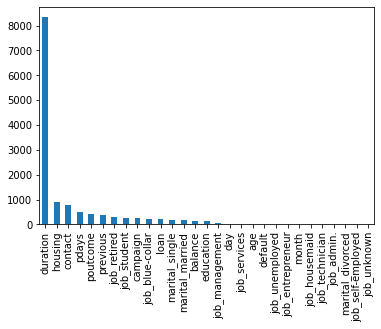

In [26]:
p,_=f_classif(X,y)
s1=pd.Series(p,index=X.columns)
s1.sort_values(ascending=False).plot(kind="bar")

<AxesSubplot:>

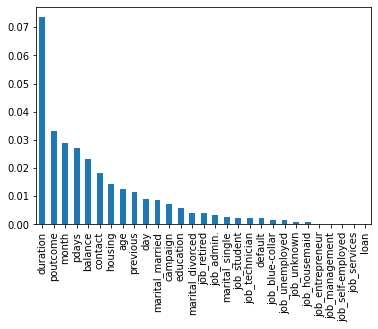

In [27]:
p=mutual_info_classif(X,y)
s1=pd.Series(p,index=X.columns)
s1.sort_values(ascending=False).plot(kind="bar")

In [28]:
p=VarianceThreshold(threshold=0.2)
p.fit(X,y)
p.get_feature_names_out()

array(['age', 'education', 'balance', 'housing', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'marital_married', 'marital_single'], dtype=object)

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

<AxesSubplot:>

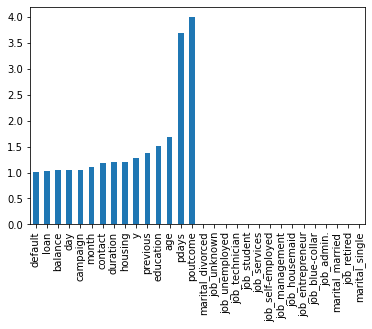

In [30]:
vif=[variance_inflation_factor(df.values,index) for index in range(len(df.columns))]
s3=pd.Series(vif,index=df.columns)
s3.sort_values().plot(kind="bar")

# SMOTE - imbalance data

In [31]:
imb=SMOTE(sampling_strategy=0.80,random_state=10,k_neighbors=5)
X_smt,y_smt=imb.fit_resample(X,y)

In [32]:
X_smt.shape,y_smt.shape

((71859, 29), (71859,))

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X_smt,y_smt,train_size=0.70,random_state=12)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((50301, 29), (21558, 29), (50301,), (21558,))

In [34]:
# convert data into one scaler form
norm=MinMaxScaler()
norm_X_train=norm.fit_transform(X_train)
norm_X_test=norm.transform(X_test)

In [35]:
X_train=pd.DataFrame(norm_X_train,columns=X_train.columns)

In [36]:
X_test=pd.DataFrame(norm_X_test,columns=X_test.columns)

In [96]:
with open("norm_scale.pickle","wb") as f:
    pickle.dump(norm,f)

# Model Training

In [37]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [38]:
def model_eval(model,x,y):
    pred=model.predict(x)
    accu=accuracy_score(y,pred)
    print("accuracy score = ",accu)
    cm=confusion_matrix(y,pred)
    print("confusion_matrix = ",cm)
    cr=classification_report(y,pred)
    print("classification_report = ",cr)

In [39]:
model_eval(lr,X_train,y_train)

accuracy score =  0.9094650205761317
confusion_matrix =  [[27170   850]
 [ 3704 18577]]
classification_report =                precision    recall  f1-score   support

           0       0.88      0.97      0.92     28020
           1       0.96      0.83      0.89     22281

    accuracy                           0.91     50301
   macro avg       0.92      0.90      0.91     50301
weighted avg       0.91      0.91      0.91     50301



In [40]:
model_eval(lr,X_test,y_test)

accuracy score =  0.9093607941367474
confusion_matrix =  [[11539   363]
 [ 1591  8065]]
classification_report =                precision    recall  f1-score   support

           0       0.88      0.97      0.92     11902
           1       0.96      0.84      0.89      9656

    accuracy                           0.91     21558
   macro avg       0.92      0.90      0.91     21558
weighted avg       0.91      0.91      0.91     21558



In [41]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [42]:
model_eval(knn,X_train,y_train)

accuracy score =  0.9379137591697978
confusion_matrix =  [[27320   700]
 [ 2423 19858]]
classification_report =                precision    recall  f1-score   support

           0       0.92      0.98      0.95     28020
           1       0.97      0.89      0.93     22281

    accuracy                           0.94     50301
   macro avg       0.94      0.93      0.94     50301
weighted avg       0.94      0.94      0.94     50301



In [43]:
model_eval(knn,X_test,y_test)

accuracy score =  0.9153910381296966
confusion_matrix =  [[11408   494]
 [ 1330  8326]]
classification_report =                precision    recall  f1-score   support

           0       0.90      0.96      0.93     11902
           1       0.94      0.86      0.90      9656

    accuracy                           0.92     21558
   macro avg       0.92      0.91      0.91     21558
weighted avg       0.92      0.92      0.91     21558



In [44]:
hyper_para={"n_neighbors":np.arange(2,10),"p":[1,2]}
rmcv=RandomizedSearchCV(knn,hyper_para,cv=5)
rmcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'p': [1, 2]})

In [45]:
rmcv.best_params_

{'p': 1, 'n_neighbors': 3}

In [46]:
knn_para=KNeighborsClassifier(n_neighbors=3,p=1)
knn_para.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

In [47]:
model_eval(knn_para,X_train,y_train)

accuracy score =  0.9329436790521063
confusion_matrix =  [[27397   623]
 [ 2750 19531]]
classification_report =                precision    recall  f1-score   support

           0       0.91      0.98      0.94     28020
           1       0.97      0.88      0.92     22281

    accuracy                           0.93     50301
   macro avg       0.94      0.93      0.93     50301
weighted avg       0.94      0.93      0.93     50301



In [48]:
model_eval(knn_para,X_test,y_test)

accuracy score =  0.9179886816958902
confusion_matrix =  [[11516   386]
 [ 1382  8274]]
classification_report =                precision    recall  f1-score   support

           0       0.89      0.97      0.93     11902
           1       0.96      0.86      0.90      9656

    accuracy                           0.92     21558
   macro avg       0.92      0.91      0.92     21558
weighted avg       0.92      0.92      0.92     21558



In [86]:
with open("knn_model.pickle","wb") as f:
    pickle.dump(knn_para,f)

In [49]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
model_eval(dt,X_train,y_train)

accuracy score =  1.0
confusion_matrix =  [[28020     0]
 [    0 22281]]
classification_report =                precision    recall  f1-score   support

           0       1.00      1.00      1.00     28020
           1       1.00      1.00      1.00     22281

    accuracy                           1.00     50301
   macro avg       1.00      1.00      1.00     50301
weighted avg       1.00      1.00      1.00     50301



In [51]:
model_eval(dt,X_test,y_test)

accuracy score =  0.9001762686705631
confusion_matrix =  [[10764  1138]
 [ 1014  8642]]
classification_report =                precision    recall  f1-score   support

           0       0.91      0.90      0.91     11902
           1       0.88      0.89      0.89      9656

    accuracy                           0.90     21558
   macro avg       0.90      0.90      0.90     21558
weighted avg       0.90      0.90      0.90     21558



In [52]:
hyper_para={"criterion":['gini','entropy'],"max_depth":np.arange(2,10),"min_samples_split":np.arange(2,10),"min_samples_leaf":np.arange(1,3)}
rmcv_dt=RandomizedSearchCV(dt,hyper_para,cv=5)
rmcv_dt.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([1, 2]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [53]:
rmcv_dt.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_depth': 9,
 'criterion': 'gini'}

In [54]:
dt_para=DecisionTreeClassifier(min_samples_split=8,min_samples_leaf=2,max_depth=9,criterion='gini')
dt_para.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [55]:
model_eval(dt_para,X_train,y_train)

accuracy score =  0.8943559770183496
confusion_matrix =  [[25544  2476]
 [ 2838 19443]]
classification_report =                precision    recall  f1-score   support

           0       0.90      0.91      0.91     28020
           1       0.89      0.87      0.88     22281

    accuracy                           0.89     50301
   macro avg       0.89      0.89      0.89     50301
weighted avg       0.89      0.89      0.89     50301



In [56]:
model_eval(dt_para,X_test,y_test)

accuracy score =  0.8781890713424251
confusion_matrix =  [[10694  1208]
 [ 1418  8238]]
classification_report =                precision    recall  f1-score   support

           0       0.88      0.90      0.89     11902
           1       0.87      0.85      0.86      9656

    accuracy                           0.88     21558
   macro avg       0.88      0.88      0.88     21558
weighted avg       0.88      0.88      0.88     21558



[Text(0.4661378081664099, 0.95, 'duration <= 0.052\nentropy = 0.991\nsamples = 50301\nvalue = [28020, 22281]\nclass = 0'),
 Text(0.2192074345146379, 0.85, 'housing <= 0.5\nentropy = 0.695\nsamples = 20929\nvalue = [17018, 3911]\nclass = 0'),
 Text(0.10896571648690292, 0.75, 'duration <= 0.031\nentropy = 0.908\nsamples = 10895\nvalue = [7373, 3522]\nclass = 0'),
 Text(0.04352850539291217, 0.65, 'duration <= 0.02\nentropy = 0.542\nsamples = 4879\nvalue = [4272, 607]\nclass = 0'),
 Text(0.015408320493066256, 0.55, 'month <= 0.318\nentropy = 0.132\nsamples = 2189\nvalue = [2149, 40]\nclass = 0'),
 Text(0.007704160246533128, 0.45, 'duration <= 0.015\nentropy = 0.337\nsamples = 304\nvalue = [285, 19]\nclass = 0'),
 Text(0.0030816640986132513, 0.35, 'age <= 0.691\nentropy = 0.047\nsamples = 190\nvalue = [189, 1]\nclass = 0'),
 Text(0.0015408320493066256, 0.25, 'entropy = 0.0\nsamples = 187\nvalue = [187, 0]\nclass = 0'),
 Text(0.004622496147919877, 0.25, 'age <= 0.724\nentropy = 0.918\nsample

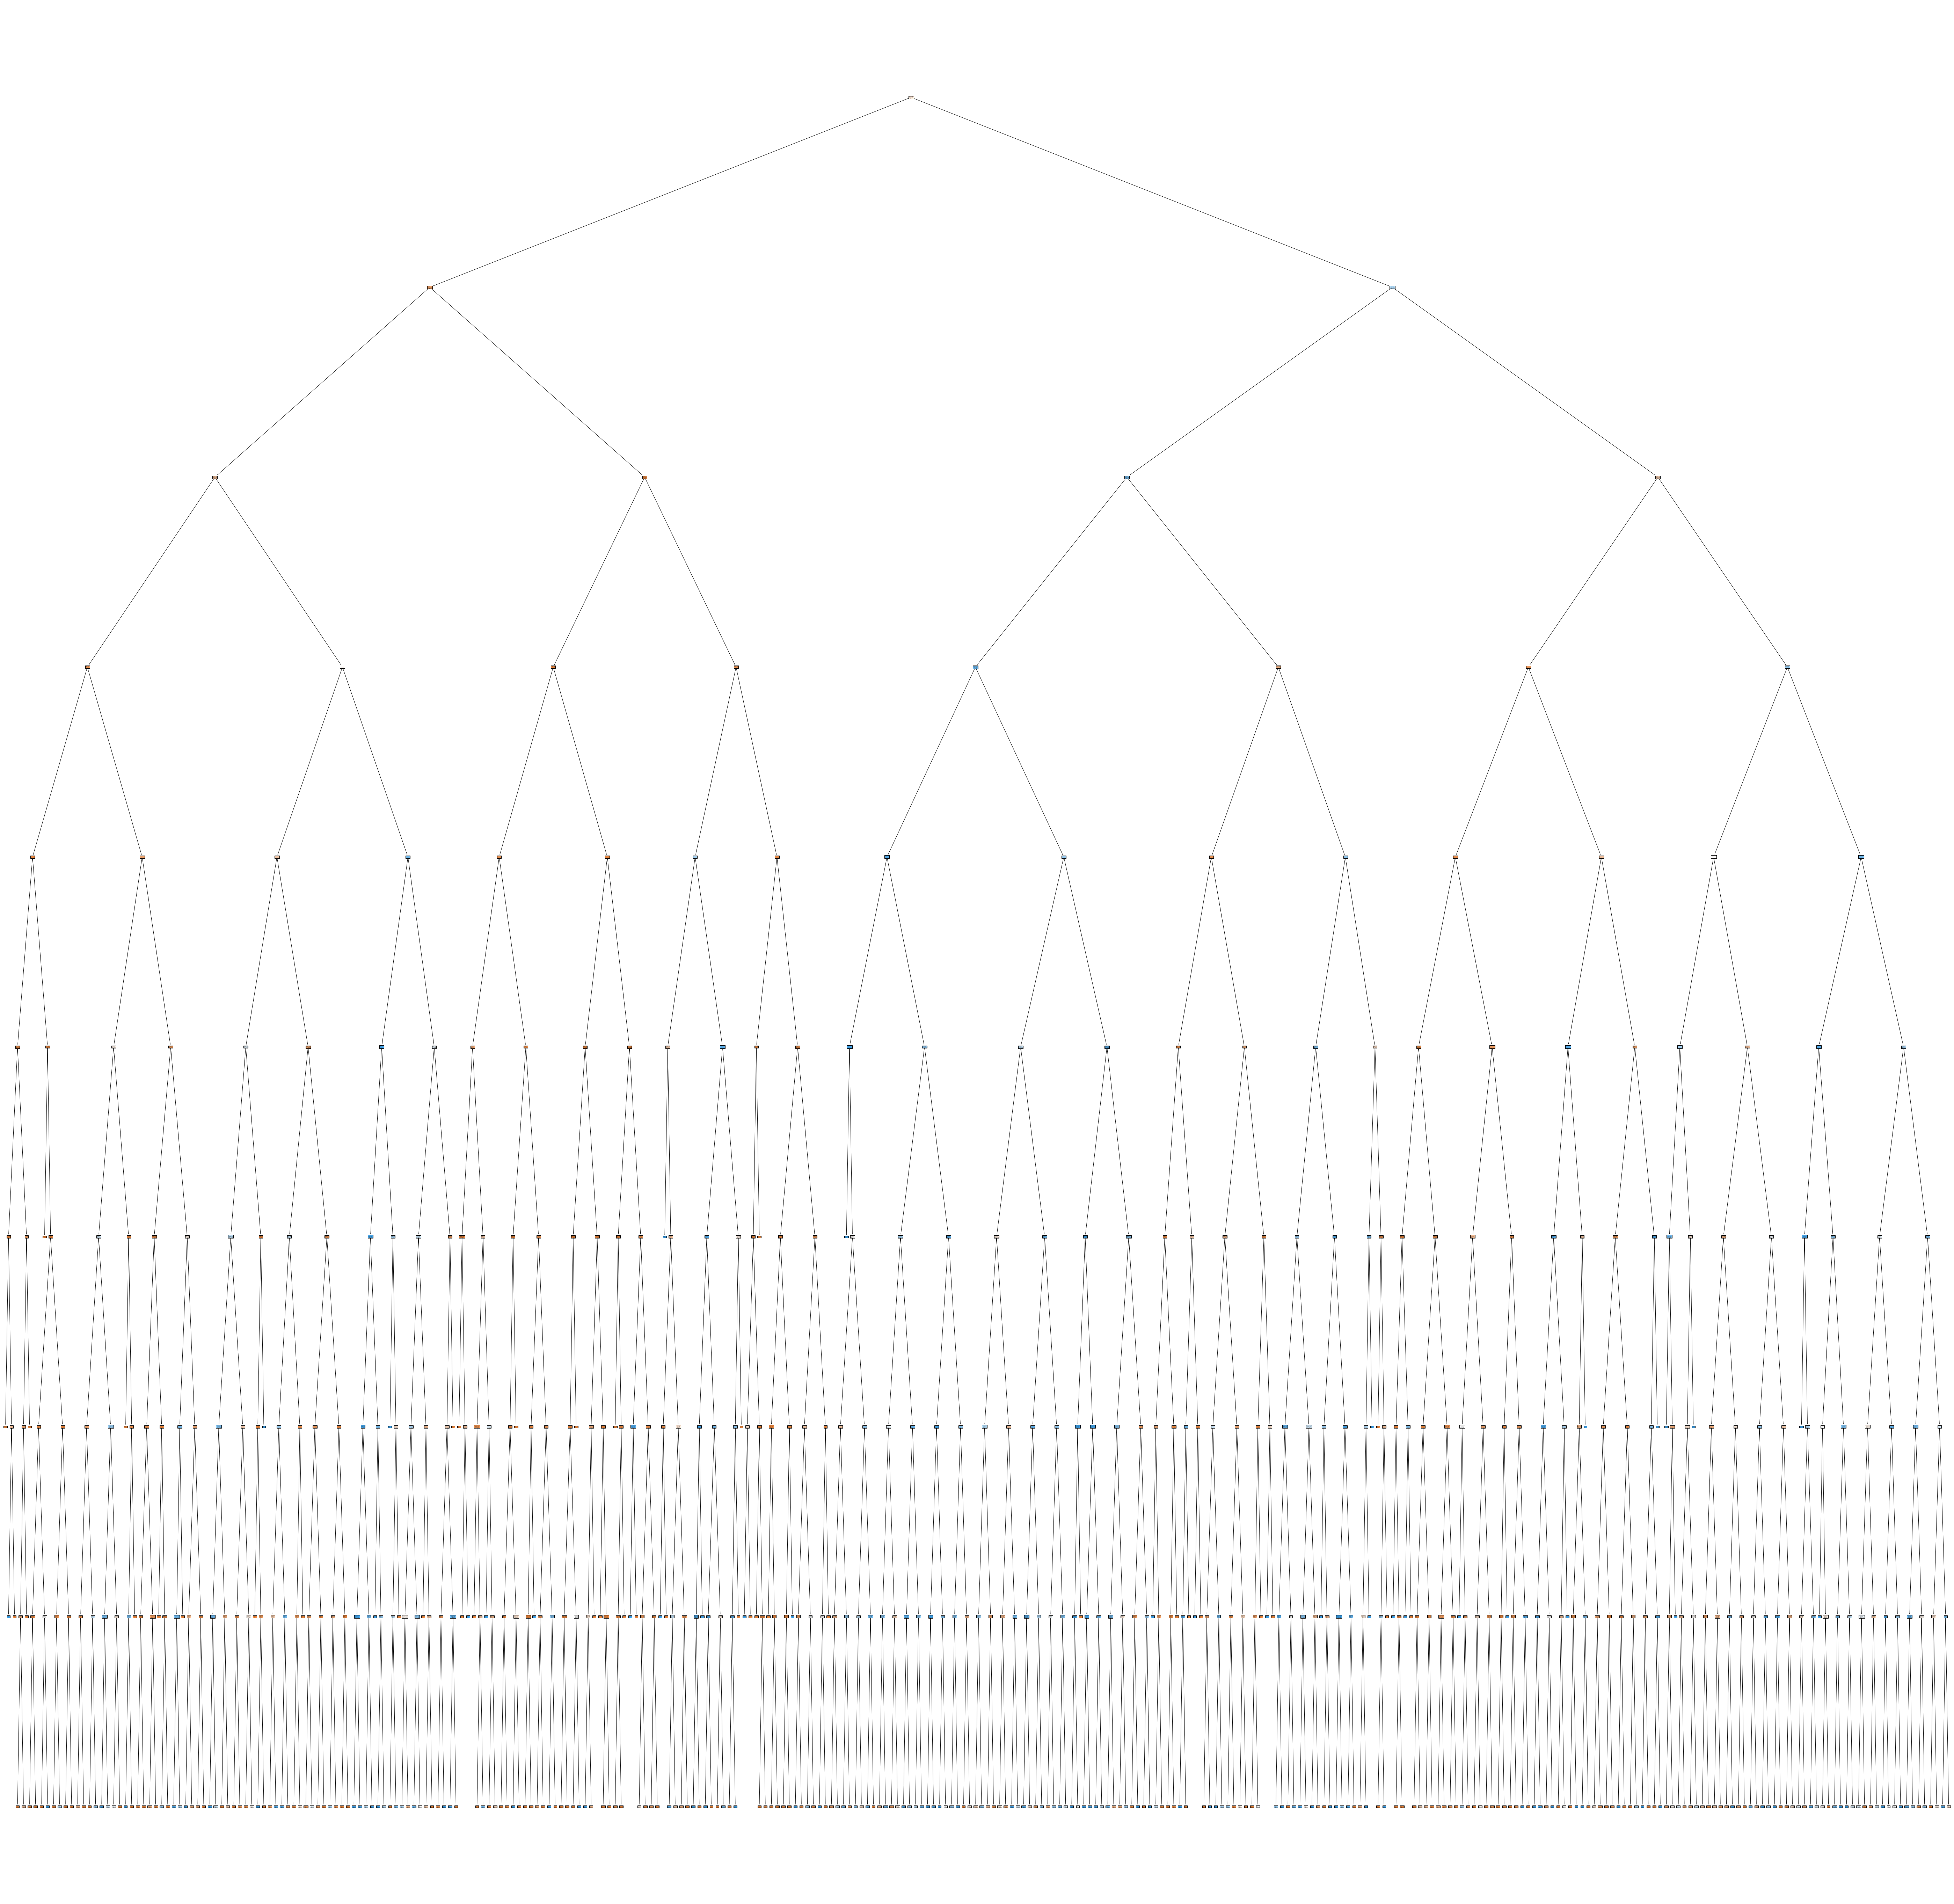

In [57]:
plt.figure(figsize=(100,100))
plot_tree(dt_para,feature_names=X.columns,class_names=['0','1'],filled=True)

In [77]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [78]:
model_eval(rf,X_train,y_train)

accuracy score =  1.0
confusion_matrix =  [[28020     0]
 [    0 22281]]
classification_report =                precision    recall  f1-score   support

           0       1.00      1.00      1.00     28020
           1       1.00      1.00      1.00     22281

    accuracy                           1.00     50301
   macro avg       1.00      1.00      1.00     50301
weighted avg       1.00      1.00      1.00     50301



In [79]:
model_eval(rf,X_test,y_test)

accuracy score =  0.9353372297986826
confusion_matrix =  [[11299   603]
 [  791  8865]]
classification_report =                precision    recall  f1-score   support

           0       0.93      0.95      0.94     11902
           1       0.94      0.92      0.93      9656

    accuracy                           0.94     21558
   macro avg       0.94      0.93      0.93     21558
weighted avg       0.94      0.94      0.94     21558



In [80]:
hyper_para={"n_estimators":np.arange(5,150,5),"criterion":['gini','entropy'],"max_depth":np.arange(2,10),"min_samples_split":np.arange(2,10),"min_samples_leaf":np.arange(1,3)}
rmcv_rf=RandomizedSearchCV(rf,hyper_para,cv=5)
rmcv_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([1, 2]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145])})

In [81]:
rmcv_rf.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 9,
 'criterion': 'entropy'}

In [82]:
rf_para=RandomForestClassifier(n_estimators=50,min_samples_split=2,min_samples_leaf=1,max_depth=9,criterion='entropy')
rf_para.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=50)

In [83]:
model_eval(rf_para,X_train,y_train)

accuracy score =  0.9138386910797002
confusion_matrix =  [[25697  2323]
 [ 2011 20270]]
classification_report =                precision    recall  f1-score   support

           0       0.93      0.92      0.92     28020
           1       0.90      0.91      0.90     22281

    accuracy                           0.91     50301
   macro avg       0.91      0.91      0.91     50301
weighted avg       0.91      0.91      0.91     50301



In [84]:
model_eval(rf_para,X_test,y_test)

accuracy score =  0.902402820298729
confusion_matrix =  [[10808  1094]
 [ 1010  8646]]
classification_report =                precision    recall  f1-score   support

           0       0.91      0.91      0.91     11902
           1       0.89      0.90      0.89      9656

    accuracy                           0.90     21558
   macro avg       0.90      0.90      0.90     21558
weighted avg       0.90      0.90      0.90     21558



In [85]:
with open("rf_model.pickle","wb") as f:
    pickle.dump(rf_para,f)

In [91]:
columns_list={"columns":list(X_train.columns)}

In [93]:
with open("columns_list.json","w") as f:
    json.dump(columns_list,f)

In [66]:
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [67]:
model_eval(ada,X_train,y_train)

accuracy score =  0.9150911512693585
confusion_matrix =  [[26245  1775]
 [ 2496 19785]]
classification_report =                precision    recall  f1-score   support

           0       0.91      0.94      0.92     28020
           1       0.92      0.89      0.90     22281

    accuracy                           0.92     50301
   macro avg       0.92      0.91      0.91     50301
weighted avg       0.92      0.92      0.91     50301



In [68]:
model_eval(ada,X_test,y_test)

accuracy score =  0.9145560812691345
confusion_matrix =  [[11146   756]
 [ 1086  8570]]
classification_report =                precision    recall  f1-score   support

           0       0.91      0.94      0.92     11902
           1       0.92      0.89      0.90      9656

    accuracy                           0.91     21558
   macro avg       0.92      0.91      0.91     21558
weighted avg       0.91      0.91      0.91     21558



In [69]:
hyper_para={"learning_rate":np.arange(0.01,0.1,0.04),"n_estimators":np.arange(5,100)}
rmcv_ada=RandomizedSearchCV(ada,hyper_para,cv=5)
rmcv_ada.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': array([0.01, 0.05, 0.09]),
                                        'n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [70]:
rmcv_ada.best_params_

{'n_estimators': 77, 'learning_rate': 0.09}

In [71]:
ada_para=AdaBoostClassifier(learning_rate=0.09,n_estimators=86)
ada_para.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.09, n_estimators=86)

In [72]:
model_eval(ada_para,X_train,y_train)

accuracy score =  0.8621498578557086
confusion_matrix =  [[24666  3354]
 [ 3580 18701]]
classification_report =                precision    recall  f1-score   support

           0       0.87      0.88      0.88     28020
           1       0.85      0.84      0.84     22281

    accuracy                           0.86     50301
   macro avg       0.86      0.86      0.86     50301
weighted avg       0.86      0.86      0.86     50301



In [73]:
model_eval(ada_para,X_test,y_test)

accuracy score =  0.8592633825030151
confusion_matrix =  [[10450  1452]
 [ 1582  8074]]
classification_report =                precision    recall  f1-score   support

           0       0.87      0.88      0.87     11902
           1       0.85      0.84      0.84      9656

    accuracy                           0.86     21558
   macro avg       0.86      0.86      0.86     21558
weighted avg       0.86      0.86      0.86     21558

